In [214]:
import pandas as pd


In [215]:

file1 = "injNHLdata18.csv"

file2 = "NHLBodstat_18.csv"

# file6 = "NHLTimeonIce_18.csv"

file3 = "injCount18.csv"


NHLInjCnt = pd.read_csv(file3)
NHLBodstat = pd.read_csv(file2)
NHLInj = pd.read_csv(file1)




In [216]:
NHLInj = NHLInj.drop(['Unnamed: 0', 'CAP HIT', 'CHIP', 'POSITION', 'SEASON'], axis=1)
NHLInj.head()

,GAMES MISSED,INJURY TYPE,PLAYER,TEAM
0,14,Lower body,Comtois Maxime,Anaheim
1,33,Ribs,Eaves Patrick,Anaheim
2,13,Shoulder,Eaves Patrick,Anaheim
3,5,Groin,Getzlaf Ryan,Anaheim
4,1,Upper body,Getzlaf Ryan,Anaheim


In [217]:
NHLInjCnt.head()

,Unnamed: 0,PLAYER,INJURY COUNT,CAP HIT,CHIP,GAMES MISSED,INJURY TYPE,POSITION,SEASON,TEAM
0,0,Abdelkader Justin,1,4.25,570.121951,11,Leg,F,2018/19,Detroit
1,1,Aberg Pontus,1,0.65,63.414634,8,Lower body,F,2018/19,Minnesota
2,2,Andersen Frederik,2,5.00,365.853659,6,Groin,G,2018/19,Toronto
3,3,Andersen Frederik,2,5.00,60.975610,1,Knee,G,2018/19,Toronto
4,4,Anderson Craig,2,4.75,637.195122,11,Concussion,G,2018/19,Ottawa


In [218]:
NHLInjCnt = NHLInjCnt.drop(['Unnamed: 0', 'CAP HIT', 'CHIP', 'POSITION', 'SEASON'], axis=1)
NHLInjCnt.head()

,PLAYER,INJURY COUNT,GAMES MISSED,INJURY TYPE,TEAM
0,Abdelkader Justin,1,11,Leg,Detroit
1,Aberg Pontus,1,8,Lower body,Minnesota
2,Andersen Frederik,2,6,Groin,Toronto
3,Andersen Frederik,2,1,Knee,Toronto
4,Anderson Craig,2,11,Concussion,Ottawa


In [219]:
# NHLBodstat

injured_or_not = []

injured_players = list(NHLInjCnt['PLAYER'])

for player in NHLBodstat['PLAYER']:
    if player in injured_players:
        injured_or_not.append('Injured')
    else:
        injured_or_not.append('Not Injured')   

In [220]:
# injured_or_not

NHLBodstat['Injury Status'] = injured_or_not

In [221]:
NHLBodstat.head()

,Unnamed: 0,TEAM,POSITION,HEIGHT,WEIGHT,BIRTHDATE,PLAYER,AGE,Injury Status
0,1,DET,LW,"6'2""",214,2/25/1987,Abdelkader Justin,32,Injured
1,2,MIN,LW,"5'11""",196,9/23/1993,Aberg Pontus,25,Injured
2,3,OTT,RW,"5'9""",171,5/08/1998,Abramov Vitaly,21,Not Injured
3,4,BOS,C,"5'10""",205,12/01/1991,Acciari Noel,27,Not Injured
4,6,NJ,LW,"6'0""",199,4/30/1992,Agostino Kenny,27,Not Injured


In [222]:
NHLBodstat.head()                   


,Unnamed: 0,TEAM,POSITION,HEIGHT,WEIGHT,BIRTHDATE,PLAYER,AGE,Injury Status
0,1,DET,LW,"6'2""",214,2/25/1987,Abdelkader Justin,32,Injured
1,2,MIN,LW,"5'11""",196,9/23/1993,Aberg Pontus,25,Injured
2,3,OTT,RW,"5'9""",171,5/08/1998,Abramov Vitaly,21,Not Injured
3,4,BOS,C,"5'10""",205,12/01/1991,Acciari Noel,27,Not Injured
4,6,NJ,LW,"6'0""",199,4/30/1992,Agostino Kenny,27,Not Injured


In [223]:
NHLBodstat = NHLBodstat.drop(['Unnamed: 0', 'TEAM', 'BIRTHDATE'], axis=1)
NHLBodstat.head()


,POSITION,HEIGHT,WEIGHT,PLAYER,AGE,Injury Status
0,LW,"6'2""",214,Abdelkader Justin,32,Injured
1,LW,"5'11""",196,Aberg Pontus,25,Injured
2,RW,"5'9""",171,Abramov Vitaly,21,Not Injured
3,C,"5'10""",205,Acciari Noel,27,Not Injured
4,LW,"6'0""",199,Agostino Kenny,27,Not Injured


In [224]:
# write merged bodystats/Injury
NHLBodstat.to_csv('InjStatus.csv', index=True, header=True)


In [225]:
NHL_injBod=pd.merge(NHLBodstat, NHLInjCnt, left_on ='PLAYER',right_on='PLAYER',how="left",sort=True)
# print(NHL.shape())
NHL_injBod.head()

,POSITION,HEIGHT,WEIGHT,PLAYER,AGE,Injury Status,INJURY COUNT,GAMES MISSED,INJURY TYPE,TEAM
0,LW,"6'2""",214,Abdelkader Justin,32,Injured,1.0,11.0,Leg,Detroit
1,LW,"5'11""",196,Aberg Pontus,25,Injured,1.0,8.0,Lower body,Minnesota
2,RW,"5'9""",171,Abramov Vitaly,21,Not Injured,NaN,NaN,NaN,NaN
3,C,"5'10""",205,Acciari Noel,27,Not Injured,NaN,NaN,NaN,NaN
4,LW,"6'0""",199,Agostino Kenny,27,Not Injured,NaN,NaN,NaN,NaN


In [226]:
# write merged bodystats/Injury
NHL_injBod.to_csv('mrg_NHL_injBod18.csv', index=True, header=True)


In [227]:
file4 = "NHLTotTime.csv"


NHLTime = pd.read_csv(file4)

NHLTime.head()

,Unnamed: 0,PLAYER,TEAM,GP,G,A,PTS,+/-,TOI/G,SHFT,SHFT/G,PROD,POS
0,0,Suter Ryan,MIN,82,7,40,47,-8,26.700000,2222,27.1,46:34:00,D
1,1,Doughty Drew,LA,82,8,37,45,-34,26.600000,2393,29.2,48:27:00,D
2,2,Letang Kris,PIT,65,16,40,56,13,25.966667,1923,29.6,30:07:00,D
3,3,Jones Seth,CBJ,75,9,37,46,1,25.816667,2214,29.5,42:06:00,D
4,4,Josi Roman,NSH,82,15,41,56,9,25.166667,2359,28.8,36:51:00,D


In [228]:
# Drop unecessary cols
NHLTime = NHLTime.drop(['Unnamed: 0', 'POS', 'TEAM'], axis=1)
NHLTime.head()

,PLAYER,GP,G,A,PTS,+/-,TOI/G,SHFT,SHFT/G,PROD
0,Suter Ryan,82,7,40,47,-8,26.700000,2222,27.1,46:34:00
1,Doughty Drew,82,8,37,45,-34,26.600000,2393,29.2,48:27:00
2,Letang Kris,65,16,40,56,13,25.966667,1923,29.6,30:07:00
3,Jones Seth,75,9,37,46,1,25.816667,2214,29.5,42:06:00
4,Josi Roman,82,15,41,56,9,25.166667,2359,28.8,36:51:00


In [229]:
# merge time on ice with previous created merge(NHL_injBod)
NHL_alldata=pd.merge(NHLTime, NHL_injBod, left_on ='PLAYER',right_on='PLAYER',how="inner",sort=True)
# print(NHL.shape())
NHL_alldata

,PLAYER,GP,G,A,PTS,+/-,TOI/G,SHFT,SHFT/G,PROD,POSITION,HEIGHT,WEIGHT,AGE,Injury Status,INJURY COUNT,GAMES MISSED,INJURY TYPE,TEAM
0,Abdelkader Justin,71,6,13,19,-14,15.400000,1465,20.6,57:32:00,LW,"6'2""",214,32,Injured,1.0,11.0,Leg,Detroit
1,Aberg Pontus,59,12,13,25,-14,14.600000,1107,18.8,34:26:00,LW,"5'11""",196,25,Injured,1.0,8.0,Lower body,Minnesota
2,Abramov Vitaly,1,0,0,0,-3,13.866667,18,18.0,0:00,RW,"5'9""",171,21,Not Injured,NaN,NaN,NaN,NaN
3,Acciari Noel,72,6,8,14,-3,12.983333,1238,17.2,66:47:00,C,"5'10""",205,27,Not Injured,NaN,NaN,NaN,NaN
4,Agostino Kenny,63,6,18,24,-3,12.916667,1072,17.0,33:54:00,LW,"6'0""",199,27,Not Injured,NaN,NaN,NaN,NaN
5,Agozzino Andrew,11,1,1,2,2,7.816667,113,10.3,42:57:00,LW,"5'10""",187,28,Not Injured,NaN,NaN,NaN,NaN
6,Aho Sebastian,82,30,53,83,25,20.150000,2008,24.5,19:54,C,"6'0""",176,21,Not Injured,NaN,NaN,NaN,NaN
7,Alt Mark,2,0,0,0,0,9.916667,29,14.5,0:00,D,"6'4""",201,27,Not Injured,NaN,NaN,NaN,NaN
8,Alzner Karl,9,0,1,1,1,17.300000,215,23.9,155:42:00,D,"6'3""",219,30,Not Injured,NaN,NaN,NaN,NaN
9,Amadio Michael,43,6,7,13,-1,10.200000,606,14.1,33:45:00,C,"6'1""",205,23,Not Injured,NaN,NaN,NaN,NaN


In [230]:
NHL_alldata.shape

(1082, 19)

In [231]:
# write final merged NHL df
NHL_alldata.to_csv('NHL_alldata.csv', index=True, header=True)


In [233]:
NHLBodstat.set_index('PLAYER',inplace=True)


In [235]:
NHLBodstat.head()

,POSITION,HEIGHT,WEIGHT,AGE,Injury Status
PLAYER,,,,,
Abdelkader Justin,LW,"6'2""",214,32,Injured
Aberg Pontus,LW,"5'11""",196,25,Injured
Abramov Vitaly,RW,"5'9""",171,21,Not Injured
Acciari Noel,C,"5'10""",205,27,Not Injured
Agostino Kenny,LW,"6'0""",199,27,Not Injured


In [237]:
NHLBodstat.reset_index().head()

,PLAYER,POSITION,HEIGHT,WEIGHT,AGE,Injury Status
0,Abdelkader Justin,LW,"6'2""",214,32,Injured
1,Aberg Pontus,LW,"5'11""",196,25,Injured
2,Abramov Vitaly,RW,"5'9""",171,21,Not Injured
3,Acciari Noel,C,"5'10""",205,27,Not Injured
4,Agostino Kenny,LW,"6'0""",199,27,Not Injured


In [240]:
import matplotlib.pyplot as plt

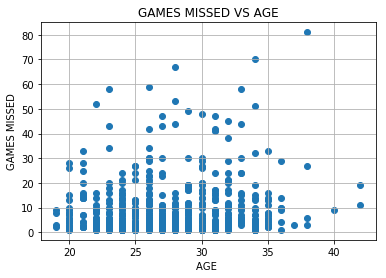

In [246]:
plt.scatter(NHL_alldata['AGE'], NHL_alldata['GAMES MISSED'], marker='o')


plt.title("GAMES MISSED VS AGE")
plt.xlabel("AGE ")
plt.ylabel("GAMES MISSED")
plt.grid()
